In [1]:
import pymysql
from sqlalchemy.types import String, Float, Integer
from sqlalchemy import DateTime
from sqlalchemy import create_engine
from sqlalchemy import exc
import os
import re
import pandas as pd
import numpy as np
import datetime as dt#准备工作，配置环境。

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
# 导入数据
conn = pymysql.connect(	
    host = '47.116.3.109',	
    user = 'dngj',	
    passwd = '603603',	
    db = 'finance',	
    port=3306,	
    charset = 'utf8'	
    )	
rates = pd.read_sql('select * from finance.rates1',conn)
rates_us = pd.read_sql('select * from finance.rates_us',conn)

In [4]:
rates

,国债1年,国债3年,国债5年,国债7年,国债10年,地方1年,地方3年,地方5年,地方7年,地方10年,...,国债3月,国债6月,国债20年,国开3月,国开6月,国开20年,国开30年,cd_3m_aaa+,国债2年,date
0,2.5850,2.7271,2.8674,3.0057,3.2096,NaN,NaN,NaN,NaN,NaN,...,2.5312,2.5492,3.8586,NaN,2.4262,4.2020,4.0462,NaN,2.6563,2002-01-04
1,2.6009,2.7380,2.8728,3.0055,3.2003,NaN,NaN,NaN,NaN,NaN,...,2.5489,2.5663,3.8140,NaN,2.4827,4.2375,4.0414,NaN,2.6697,2002-01-07
2,1.9156,2.3842,2.7890,3.1302,3.5225,NaN,NaN,NaN,NaN,NaN,...,1.7235,1.7885,3.7951,NaN,2.3470,4.3868,4.1288,NaN,2.1578,2002-01-08
3,1.9040,2.4036,2.8317,3.1884,3.5896,NaN,NaN,NaN,NaN,NaN,...,1.6983,1.7680,3.7660,NaN,2.3652,4.3702,4.0866,NaN,2.1627,2002-01-09
4,1.8987,2.3954,2.8216,3.1772,3.5784,NaN,NaN,NaN,NaN,NaN,...,1.6942,1.7635,3.7693,NaN,2.3688,4.3747,4.0863,NaN,2.1559,2002-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,2.5252,2.8089,2.9598,3.0763,3.0877,2.5446,3.0581,3.2363,3.3680,3.4354,...,1.9658,2.2010,3.5285,1.9967,2.3052,3.7184,3.9475,2.4200,2.7200,2021-06-22
4863,2.5012,2.7860,2.9514,3.0671,3.0853,2.5432,3.0454,3.2232,3.3672,3.4303,...,1.9509,2.1912,3.5185,1.9700,2.2672,3.7127,3.9175,2.4302,2.6949,2021-06-23
4864,2.4690,2.7675,2.9489,3.0714,3.0828,2.5229,3.0230,3.2156,3.3595,3.4157,...,1.9661,2.1948,3.5172,1.9825,2.2922,3.7123,3.8875,2.4221,2.6776,2021-06-24
4865,2.4437,2.7614,2.9506,3.0783,3.0827,2.4950,3.0147,3.2043,3.3553,3.4058,...,1.9151,2.1855,3.5122,1.9503,2.2549,3.7147,3.8775,2.4191,2.6655,2021-06-25


In [5]:
rates1 = rates.loc[rates['date'] >= '2007-01-01']
#计算利差
margin1 = rates1['国债10年']-rates1['国债1年']
margin2 = rates1['国债10年']-rates1['国债5年']
margin3 = rates1['国债3年']-rates1['国债1年']

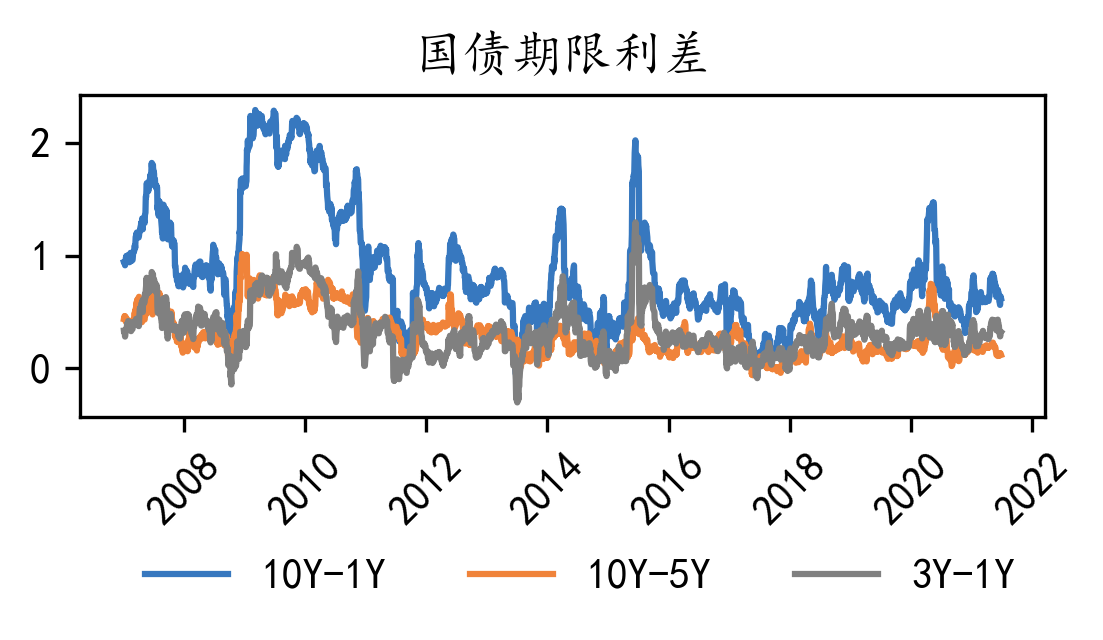

In [7]:
#国债期限利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates1['date'],margin1,'#3778bf',label="10Y-1Y")
plt.plot(rates1['date'],margin2,'#f0833a',label='10Y-5Y')
plt.plot(rates1['date'],margin3,'gray',label='3Y-1Y')

plt.title('国债期限利差', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.05,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('国债期限利差.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

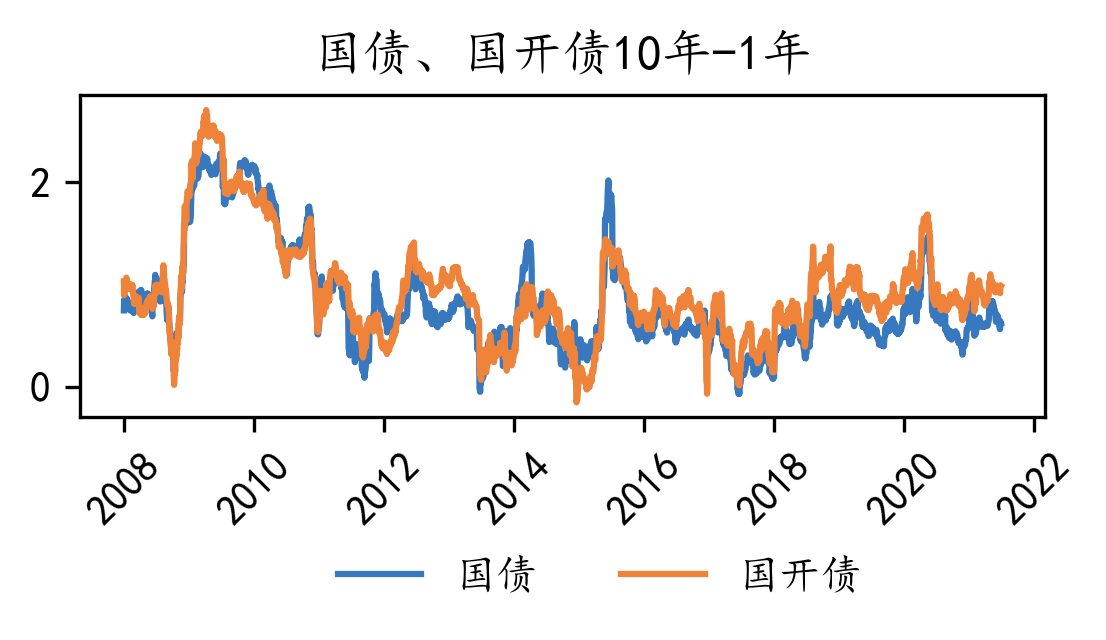

In [10]:
rates2 = rates.loc[rates['date'] >= '2008-01-01']
margin4 = rates2['国债10年']-rates2['国债1年']
margin5 = rates2['国开10年']-rates2['国开1年']

#国债、国开债10年-1年
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates2['date'],margin4,'#3778bf',label="国债")
plt.plot(rates2['date'],margin5,'#f0833a',label='国开债')

plt.title('国债、国开债10年-1年', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.25,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('国债国开债10年-1年.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [9]:
rates3 = rates.loc[rates['date'] >= '2009-01-01']

<ipython-input-11-c654d6c840c3>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(rates3['国债1年'][:-1],margin6[:-1], marker='o',color = '', edgecolors='#3778bf')
<ipython-input-11-c654d6c840c3>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(rates3['国债1年'][:1],margin6[:1], marker='o',color = '', edgecolors='#f0833a')


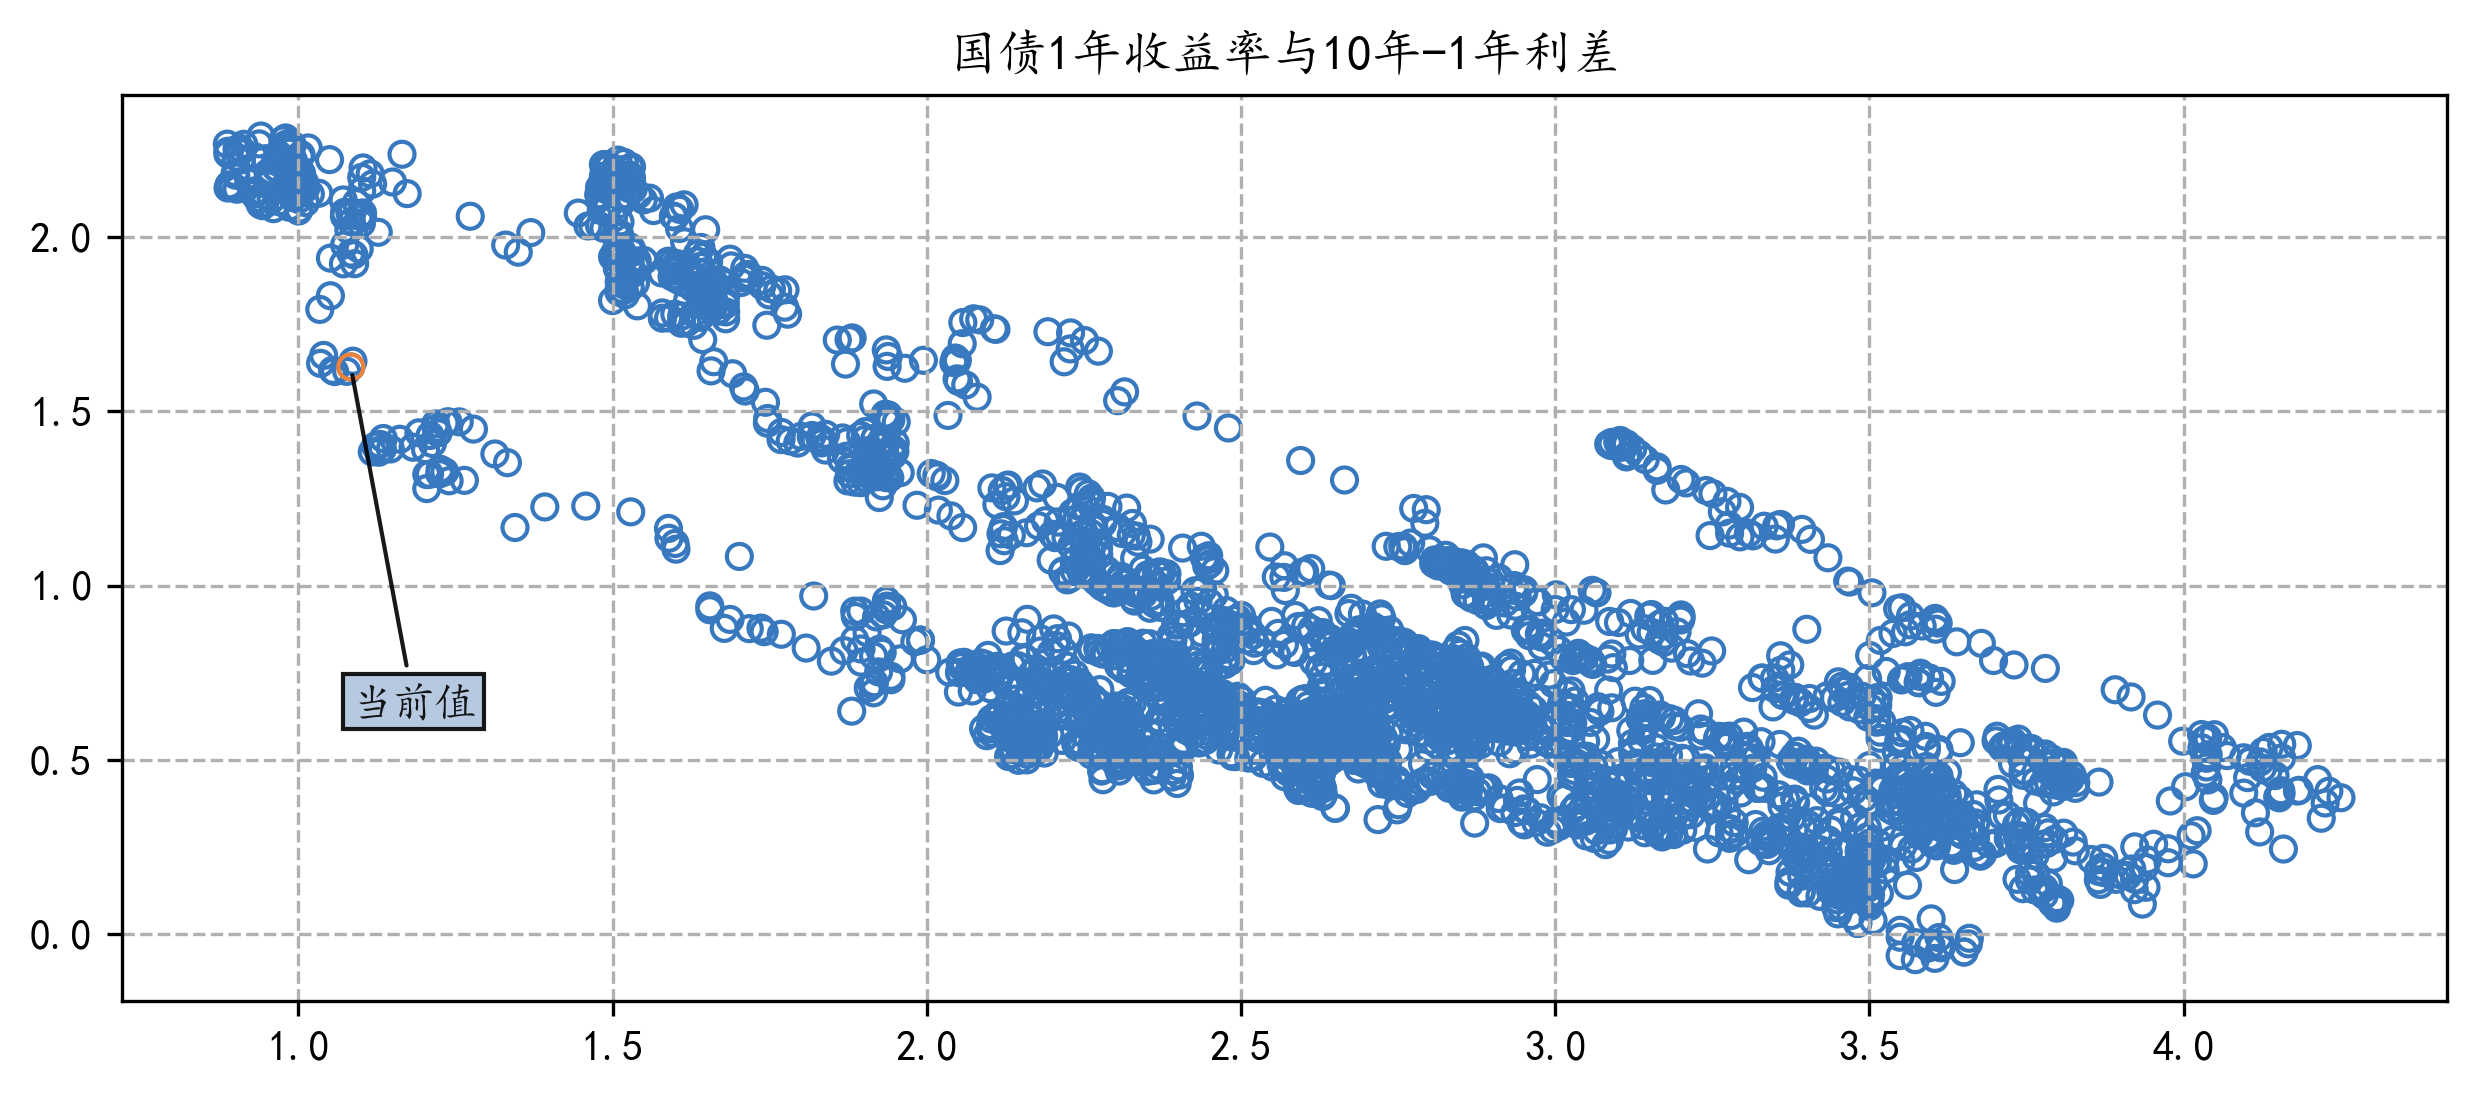

In [11]:
margin6 = rates3['国债10年']-rates3['国债1年']

#绘制国债1年收益率与10年-1年利差
plt.figure(figsize=(10,4),dpi=300, facecolor='w')
plt.grid(ls='--')
plt.rc('axes', axisbelow=True)
plt.scatter(rates3['国债1年'][:-1],margin6[:-1], marker='o',color = '', edgecolors='#3778bf')
plt.scatter(rates3['国债1年'][:1],margin6[:1], marker='o',color = '', edgecolors='#f0833a')
plt.title('国债1年收益率与10年-1年利差', fontsize=12)
plt.annotate('当前值',xy=(rates3['国债1年'][:1],margin6[:1]),xytext=(rates3['国债1年'][:1],margin6[:1]-1),color="k",weight="bold",alpha=0.9,arrowprops=dict(arrowstyle="-",connectionstyle="arc3",color="k",alpha=0.9),bbox={'facecolor': 'lightsteelblue', 'edgecolor':'k','alpha': 0.9,'pad':2},fontsize=10)
plt.savefig('国债1年收益率与10年-1年利差.jpg', dpi=300, bbox_inches = 'tight')

<ipython-input-12-07b349353981>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(rates3['国债10年'][:-1],margin7[:-1], marker='o',color = '', edgecolors='#3778bf')
<ipython-input-12-07b349353981>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(rates3['国债10年'][:1],margin7[:1], marker='o',color = '', edgecolors='#f0833a')


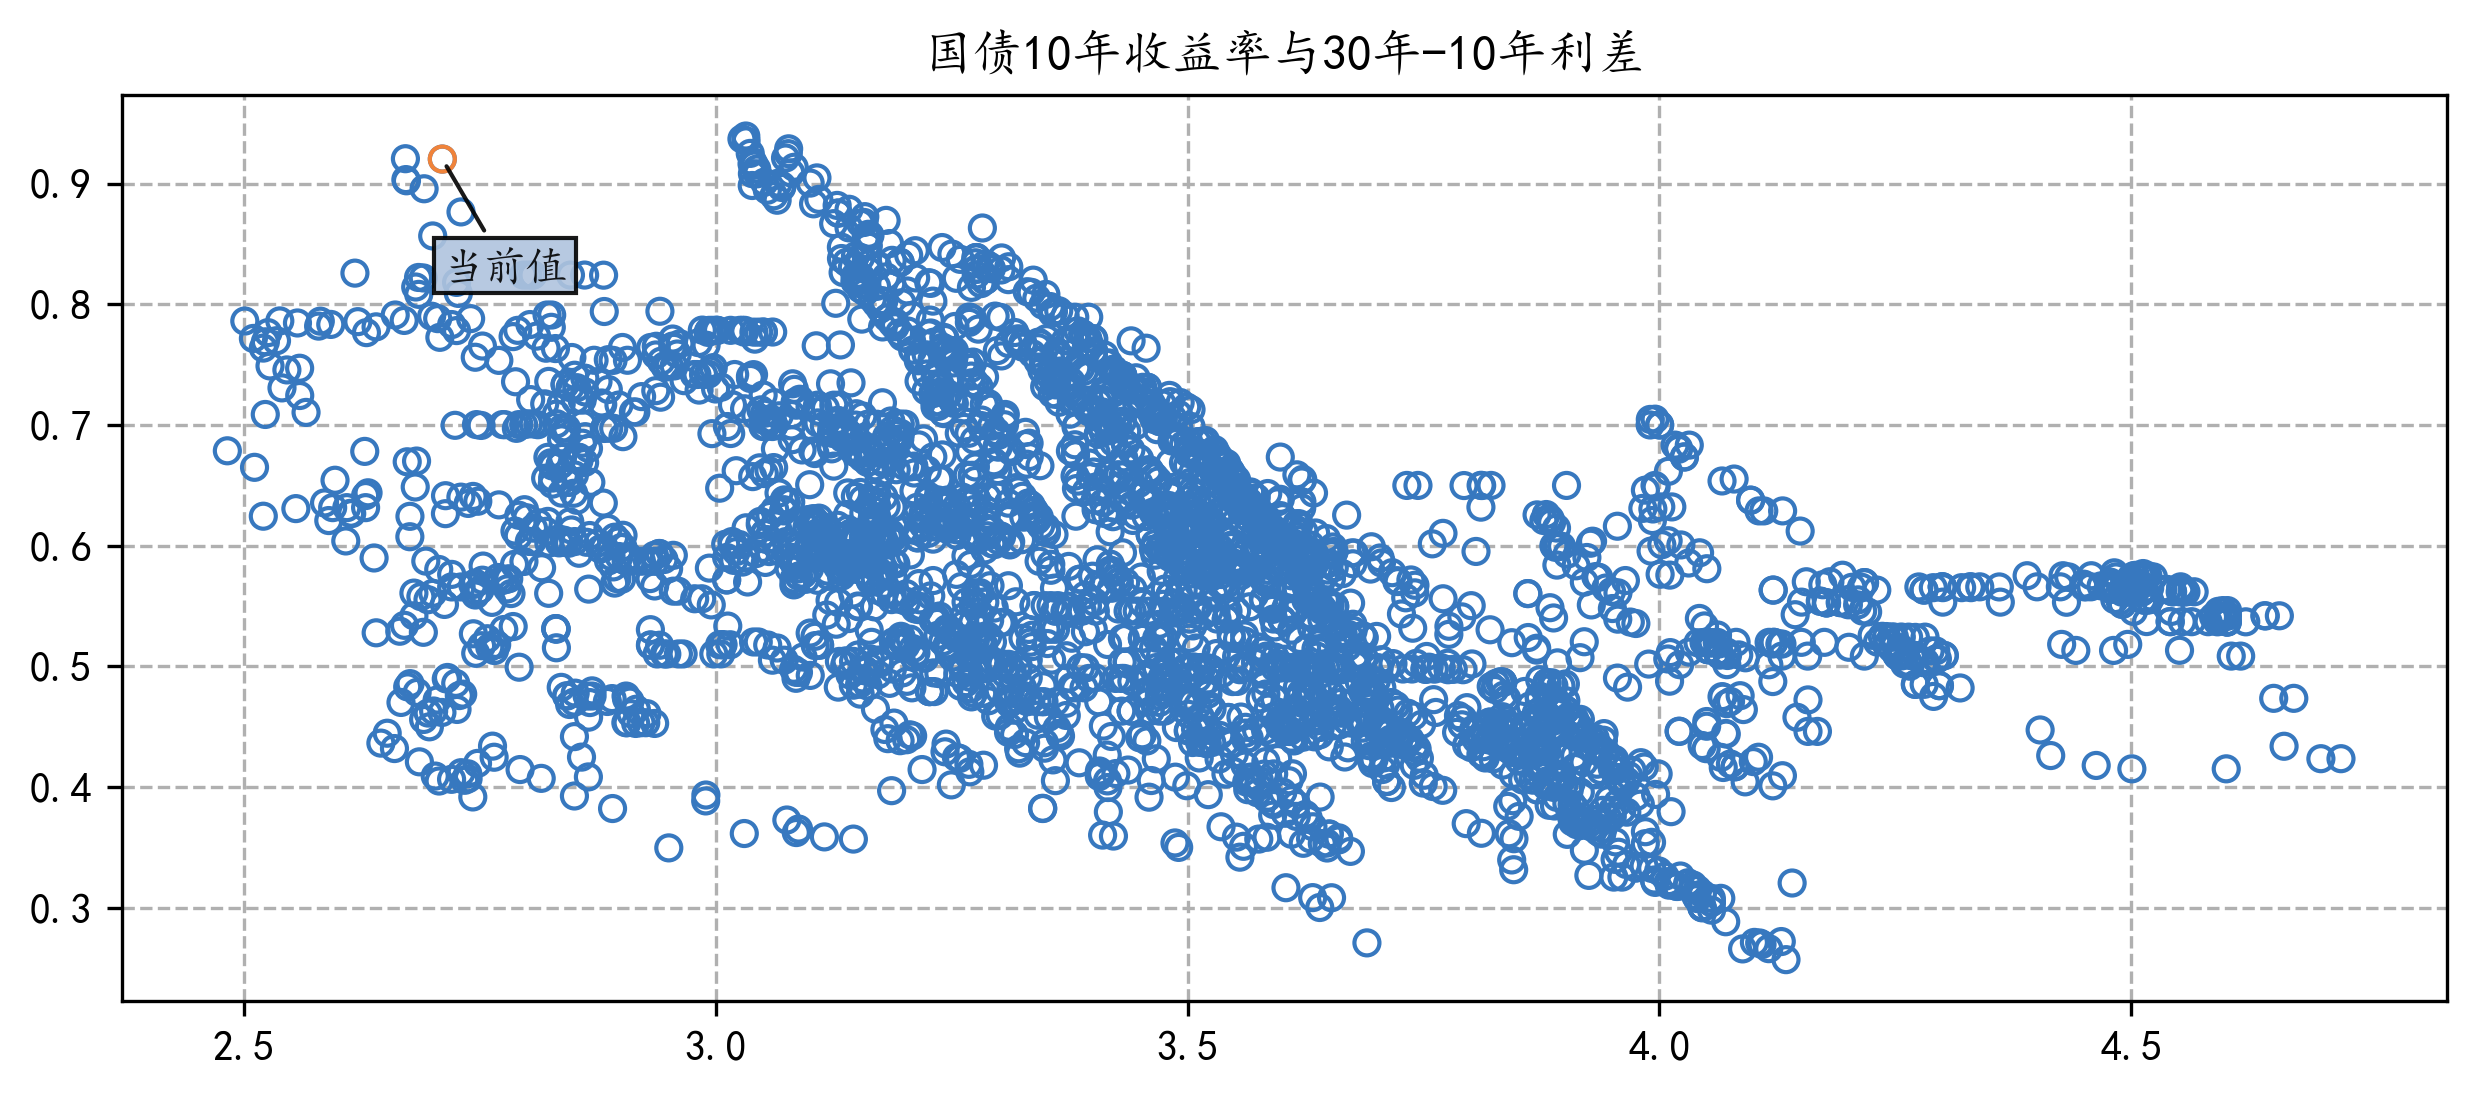

In [12]:
margin7 = rates3['国债30年']-rates3['国债10年']

#绘制国债10年收益率与30年-10年利差
plt.figure(figsize=(10,4),dpi=300, facecolor='w')
plt.grid(ls='--')
plt.rc('axes', axisbelow=True)
plt.scatter(rates3['国债10年'][:-1],margin7[:-1], marker='o',color = '', edgecolors='#3778bf')
plt.scatter(rates3['国债10年'][:1],margin7[:1], marker='o',color = '', edgecolors='#f0833a')
plt.title('国债10年收益率与30年-10年利差', fontsize=12)
plt.annotate('当前值',xy=(rates3['国债10年'][:1],margin7[:1]),xytext=(rates3['国债10年'][:1],margin7[:1]-0.1),color="k",weight="bold",alpha=0.9,arrowprops=dict(arrowstyle="-",connectionstyle="arc3",color="k",alpha=0.9),bbox={'facecolor': 'lightsteelblue', 'edgecolor':'k','alpha': 0.9,'pad':2},fontsize=10)
plt.savefig('国债10年收益率与30年-10年利差.jpg', dpi=300, bbox_inches = 'tight')

In [13]:
rates4 = rates.loc[rates['date'] >= '2015-10-08']

In [14]:
#计算2*5Y-(1Y+10Y)
gz = rates4['国债5年']*2 - ( rates4['国债1年'] + rates4['国债10年'])
gkz = rates4['国开5年']*2 - ( rates4['国开1年'] + rates4['国开10年'])

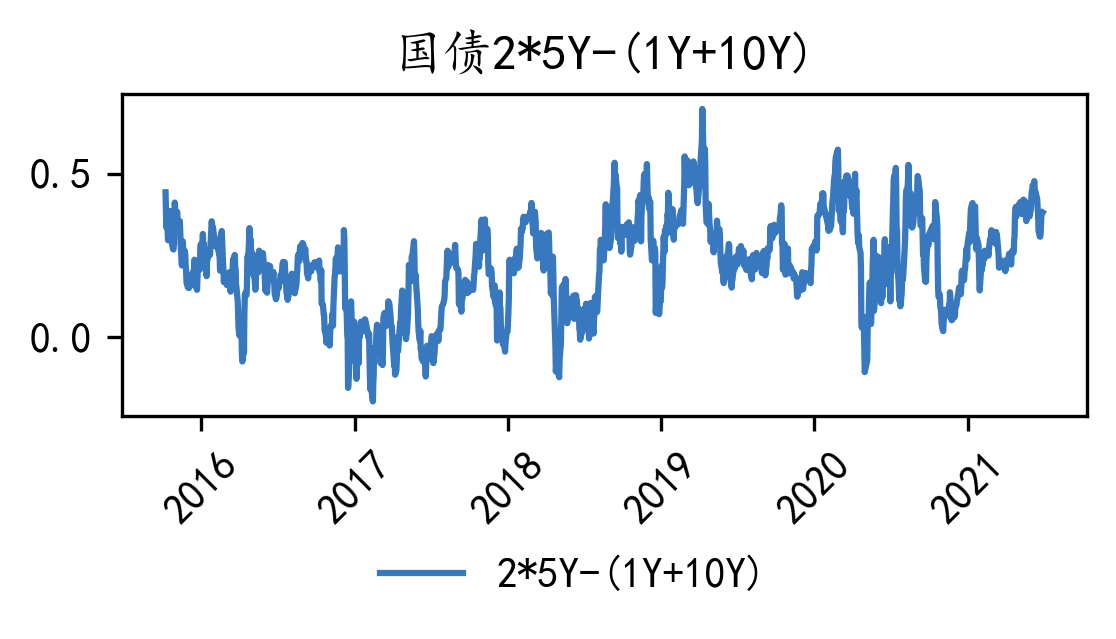

In [16]:
#国债2*5Y-(1Y+10Y)
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates4['date'],gz,'#3778bf',label="2*5Y-(1Y+10Y)")

plt.title('国债2*5Y-(1Y+10Y)', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.25,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('国债.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

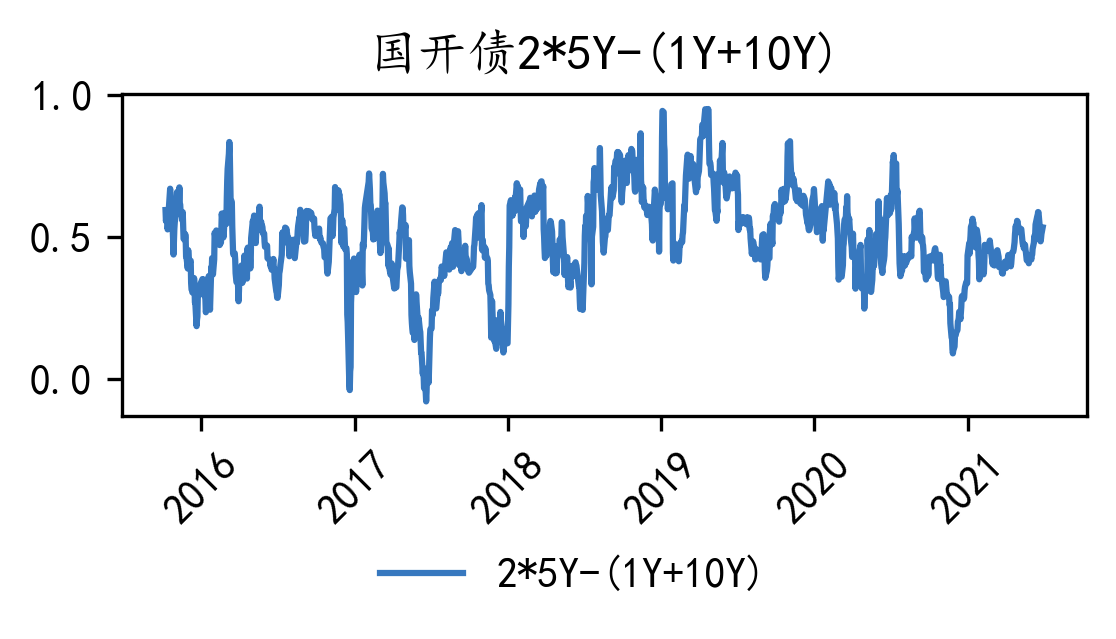

In [17]:
#国开债2*5Y-(1Y+10Y)
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates4['date'],gkz,'#3778bf',label="2*5Y-(1Y+10Y)")

plt.title('国开债2*5Y-(1Y+10Y)', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.25,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('国开债.jpg', dpi=300, bbox_inches = 'tight')
plt.show()